# Data Exploration with SAS WorkBench
In this notebook we will explore our customer churn dataset to try to identify whether there are any meaningful relationships between our variables. We will also attept to identify any data quality issues that will need to be addressed prior to developing machine learning models.
## Imports
In the next section we will import necessary packages and modules that will be used throughout this project.

In [100]:
# Imports necessary packages and modules
import matplotlib.pyplot as plt
from math import ceil
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
import seaborn as sns

In [101]:
# Import the dataset
churn_df = pd.read_csv('../data/output/customer_churn_abt.csv',header='infer')

## Basic Exploration
Explores some of the basic information pertaining the data.

In [102]:
# Display some information pertaining to the churn dataset
churn_df.info()

# Display the column variable types
dftypes = churn_df.dtypes.value_counts()
dftypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LostCustomer            5000 non-null   int64  
 1   regionPctCustomers      5000 non-null   int64  
 2   numOfTotalReturns       5000 non-null   int64  
 3   wksSinceLastPurch       5000 non-null   int64  
 4   basktPurchCount12Month  5000 non-null   int64  
 5   LastPurchaseAmount      5000 non-null   float64
 6   AvgPurchaseAmount12     5000 non-null   float64
 7   AvgPurchaseAmountTotal  5000 non-null   float64
 8   intAdExposureCount12    5000 non-null   int64  
 9   intAdExposureCount36    5000 non-null   int64  
 10  intAdExposureCountAll   5000 non-null   int64  
 11  socialMediaAdCount12    5000 non-null   int64  
 12  socialMediaAdCount36    5000 non-null   int64  
 13  socialMediaAdCountAll   5000 non-null   int64  
 14  totalNumProdPurchased   5000 non-null   

int64      16
float64     8
object      6
Name: count, dtype: int64

## Duplicate Rows
Checks and removes duplicate rows if they exist

In [103]:
churn_df = churn_df.drop_duplicates(keep='first')
churn_df.shape

(5000, 30)

## Exploring Distributions

In [104]:
# Display summary statistics for the numeric and categorical columns

for type in dftypes.index:
    print(f"---------------Variable Summary Statistics for {type} variables ----------------",end="\n\n")
    # display(churn_df.describe(include=_type).T)
    display(churn_df.describe().T)
    print("",end="\n\n")

---------------Variable Summary Statistics for int64 variables ----------------



,count,mean,std,min,25%,50%,75%,max
LostCustomer,5000.0,0.113800,0.317600,0.00,0.000000,0.000,0.000000,1.000000
regionPctCustomers,5000.0,31.279200,11.474702,0.00,25.000000,31.000,38.000000,76.000000
numOfTotalReturns,5000.0,1.500800,1.484197,0.00,0.000000,1.000,2.000000,9.000000
wksSinceLastPurch,5000.0,17.942600,4.653992,4.00,16.000000,18.000,20.000000,27.000000
basktPurchCount12Month,5000.0,3.415800,1.737905,1.00,2.000000,3.000,5.000000,10.000000
LastPurchaseAmount,5000.0,94.539740,119.455693,0.00,50.000000,75.000,100.000000,5000.000000
AvgPurchaseAmount12,5000.0,85.524630,81.084966,0.00,52.837500,75.000,100.000000,2500.000000
AvgPurchaseAmountTotal,5000.0,71.981600,62.077423,9.40,45.000000,62.000,82.500000,1714.300000
intAdExposureCount12,5000.0,13.522200,5.743736,2.00,11.000000,13.000,14.000000,48.000000
intAdExposureCount36,5000.0,29.010200,9.152838,4.00,24.000000,31.000,34.000000,68.000000




---------------Variable Summary Statistics for float64 variables ----------------



,count,mean,std,min,25%,50%,75%,max
LostCustomer,5000.0,0.113800,0.317600,0.00,0.000000,0.000,0.000000,1.000000
regionPctCustomers,5000.0,31.279200,11.474702,0.00,25.000000,31.000,38.000000,76.000000
numOfTotalReturns,5000.0,1.500800,1.484197,0.00,0.000000,1.000,2.000000,9.000000
wksSinceLastPurch,5000.0,17.942600,4.653992,4.00,16.000000,18.000,20.000000,27.000000
basktPurchCount12Month,5000.0,3.415800,1.737905,1.00,2.000000,3.000,5.000000,10.000000
LastPurchaseAmount,5000.0,94.539740,119.455693,0.00,50.000000,75.000,100.000000,5000.000000
AvgPurchaseAmount12,5000.0,85.524630,81.084966,0.00,52.837500,75.000,100.000000,2500.000000
AvgPurchaseAmountTotal,5000.0,71.981600,62.077423,9.40,45.000000,62.000,82.500000,1714.300000
intAdExposureCount12,5000.0,13.522200,5.743736,2.00,11.000000,13.000,14.000000,48.000000
intAdExposureCount36,5000.0,29.010200,9.152838,4.00,24.000000,31.000,34.000000,68.000000




---------------Variable Summary Statistics for object variables ----------------



,count,mean,std,min,25%,50%,75%,max
LostCustomer,5000.0,0.113800,0.317600,0.00,0.000000,0.000,0.000000,1.000000
regionPctCustomers,5000.0,31.279200,11.474702,0.00,25.000000,31.000,38.000000,76.000000
numOfTotalReturns,5000.0,1.500800,1.484197,0.00,0.000000,1.000,2.000000,9.000000
wksSinceLastPurch,5000.0,17.942600,4.653992,4.00,16.000000,18.000,20.000000,27.000000
basktPurchCount12Month,5000.0,3.415800,1.737905,1.00,2.000000,3.000,5.000000,10.000000
LastPurchaseAmount,5000.0,94.539740,119.455693,0.00,50.000000,75.000,100.000000,5000.000000
AvgPurchaseAmount12,5000.0,85.524630,81.084966,0.00,52.837500,75.000,100.000000,2500.000000
AvgPurchaseAmountTotal,5000.0,71.981600,62.077423,9.40,45.000000,62.000,82.500000,1714.300000
intAdExposureCount12,5000.0,13.522200,5.743736,2.00,11.000000,13.000,14.000000,48.000000
intAdExposureCount36,5000.0,29.010200,9.152838,4.00,24.000000,31.000,34.000000,68.000000


array([[<Axes: title={'center': 'LostCustomer'}>,
        <Axes: title={'center': 'regionPctCustomers'}>,
        <Axes: title={'center': 'numOfTotalReturns'}>,
        <Axes: title={'center': 'wksSinceLastPurch'}>,
        <Axes: title={'center': 'basktPurchCount12Month'}>],
       [<Axes: title={'center': 'LastPurchaseAmount'}>,
        <Axes: title={'center': 'AvgPurchaseAmount12'}>,
        <Axes: title={'center': 'AvgPurchaseAmountTotal'}>,
        <Axes: title={'center': 'intAdExposureCount12'}>,
        <Axes: title={'center': 'intAdExposureCount36'}>],
       [<Axes: title={'center': 'intAdExposureCountAll'}>,
        <Axes: title={'center': 'socialMediaAdCount12'}>,
        <Axes: title={'center': 'socialMediaAdCount36'}>,
        <Axes: title={'center': 'socialMediaAdCountAll'}>,
        <Axes: title={'center': 'totalNumProdPurchased'}>],
       [<Axes: title={'center': 'custInitiatedContacts'}>,
        <Axes: title={'center': 'avgDiscountValue12'}>,
        <Axes: title={'c

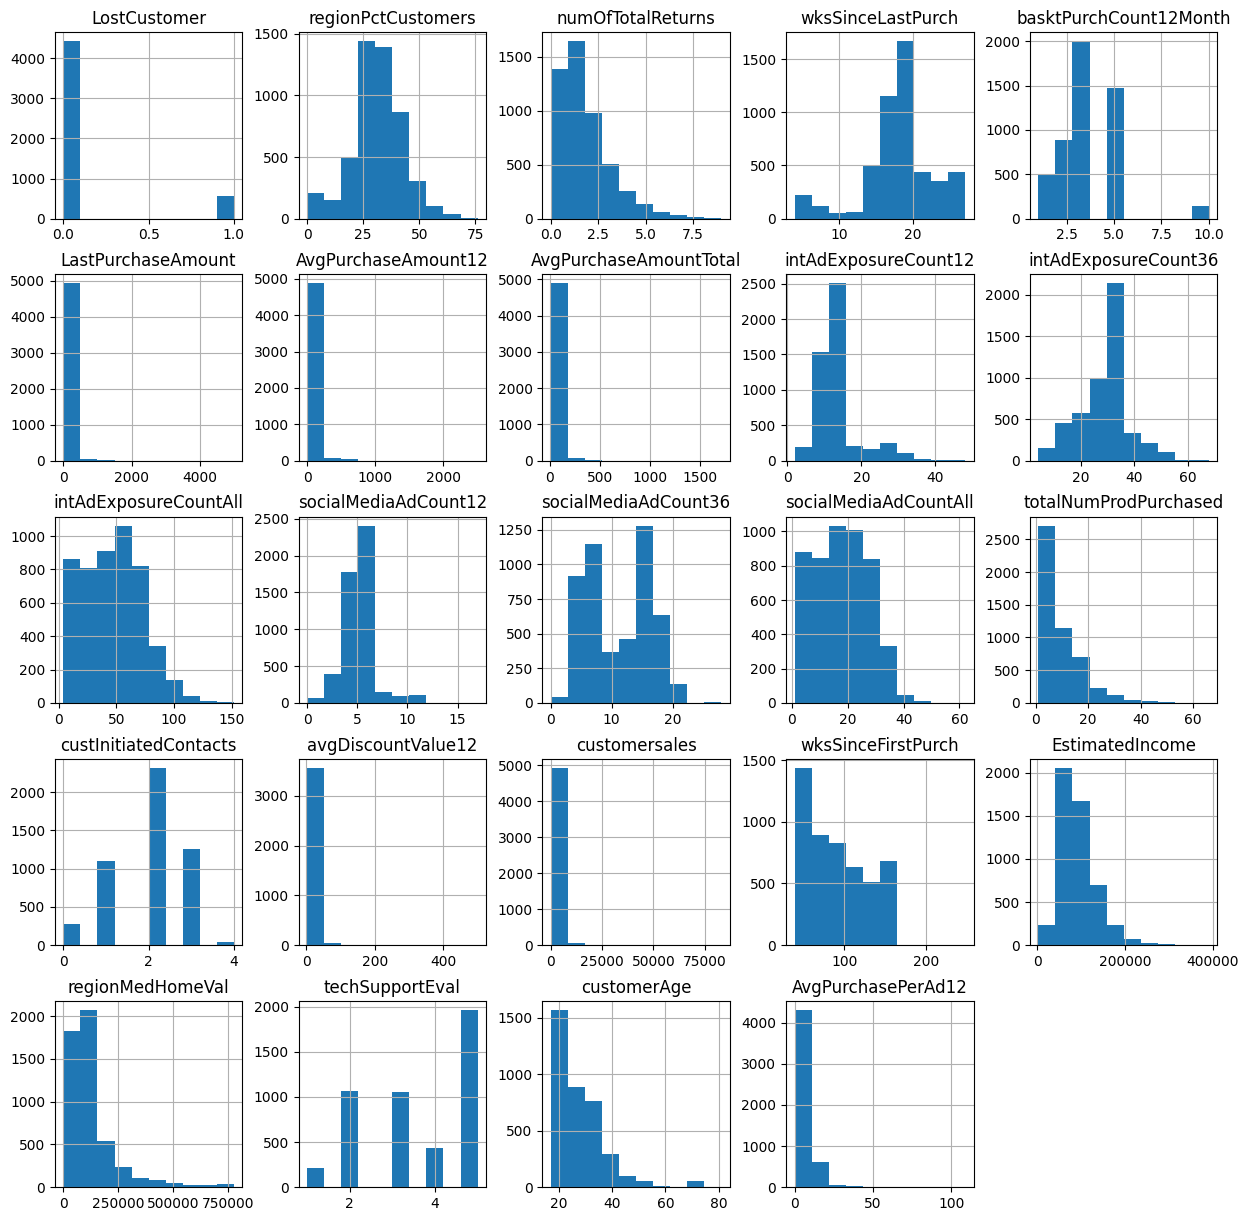

In [105]:
# Display a histogram of all of the float and int columns
churn_df.hist(figsize=(15,15))

In [106]:
# Explore the distribution of the categorical columns

cat_columns = [col for col in churn_df.select_dtypes("object").columns if col not in ["birthDate","Review_Text","Title"]]

for col in cat_columns:
    print(churn_df[col].value_counts(),end="\n\n")

DemHomeOwner
HomeOwner    2756
Unknown      2244
Name: count, dtype: int64

customerGender
F    2637
M    2077
U     286
Name: count, dtype: int64

customerSubscrStat
Platinum    3945
Gold         793
Member       262
Name: count, dtype: int64



In [107]:
# Display target variable distribution
churn_df["LostCustomer"].value_counts(normalize=True)

LostCustomer
0    0.8862
1    0.1138
Name: proportion, dtype: float64

<Axes: xlabel='LostCustomer', ylabel='count'>

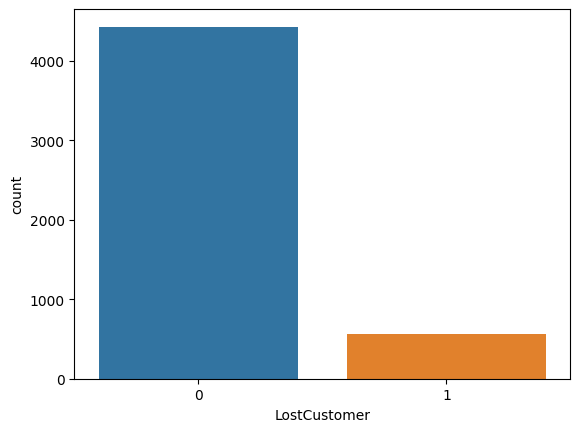

In [108]:
# Display the target variable distribution
sns.countplot(churn_df, x='LostCustomer')

In [109]:
def count_plots(data:pd.DataFrame,columns: list, figsize: tuple=(15,5),fig_per_row:int=5)->plt:
   
    # Generates a grid displaying barplots for all specified columns.append
    
    # Parameters
    # ----------------
    # data: pd.DataFrame
    #     Pandas datafrme containing data visualized
    # columns: list
    #     List contining the name of the column to be visualized
    # figsize: tuple
    #     Dimensions of the plot grid that will be generated
    # fig_per_row: int
    #     How many figures a user wants per row. Default = 5

# Determine plot dimensions
    if len(columns) < fig_per_row:
        nrows,ncols=1, fig_per_row
    else:
        nrows,ncols = ceil(len(columns) / fig_per_row), fig_per_row

    # Create subplots based on specified dimensions
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axs = axs.flatten()

    # Iterate through the columns and the created axes

    for col, ax in zip(columns,axs):
        sns.countplot(data=data, x=col, ax=ax)
        ax.set_title(f"{col} Count Plot")

    # Ensure there is no overlap between plots
    plt.tight_layout()

    # Delete any unused axes
    for ax in axs[len(columns):]:
        fig.delaxes(ax)

    return fig


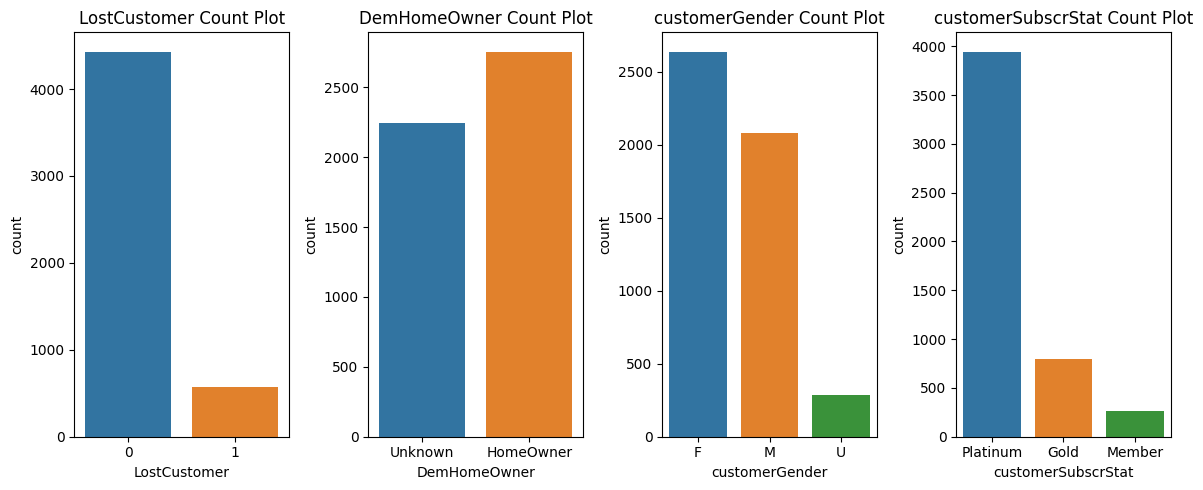

In [110]:
# Apply the count_plot function on the categorical columns
cat_count_plots = count_plots(churn_df,columns=["LostCustomer"]+cat_columns)

## Extreme Observations

In [111]:
# Compute skeweness and kurtosis for all numeric variables
skeweness=churn_df.select_dtypes(['int','float']).skew()[2:]
kurtosis=churn_df.select_dtypes(['int','float']).kurtosis()[2:]

# Display skeweness
print('-------------------SKEWENESS-------------------')
print(skeweness, end='\n\n')


-------------------SKEWENESS-------------------
numOfTotalReturns          1.353430
wksSinceLastPurch         -0.769708
basktPurchCount12Month     1.451794
LastPurchaseAmount        20.178165
AvgPurchaseAmount12       12.222168
AvgPurchaseAmountTotal    10.712645
intAdExposureCount12       1.968931
intAdExposureCount36      -0.002564
intAdExposureCountAll      0.358960
socialMediaAdCount12       0.928376
socialMediaAdCount36       0.051440
socialMediaAdCountAll      0.226121
totalNumProdPurchased      1.793127
custInitiatedContacts     -0.326428
avgDiscountValue12        13.092972
customersales             19.237148
wksSinceFirstPurch         0.323218
EstimatedIncome            1.291295
regionMedHomeVal           2.810775
techSupportEval           -0.274191
customerAge                1.955111
AvgPurchasePerAd12         3.678838
dtype: float64



In [112]:
# Display kurtosis
print('-------------------KURTOSIS-------------------')
print(kurtosis, end='\n\n')

-------------------KURTOSIS-------------------
numOfTotalReturns           2.160976
wksSinceLastPurch           1.480670
basktPurchCount12Month      3.720589
LastPurchaseAmount        663.261180
AvgPurchaseAmount12       268.555711
AvgPurchaseAmountTotal    196.227004
intAdExposureCount12        4.671521
intAdExposureCount36        0.608148
intAdExposureCountAll      -0.356862
socialMediaAdCount12        4.810288
socialMediaAdCount36       -1.320594
socialMediaAdCountAll      -0.673961
totalNumProdPurchased       4.626991
custInitiatedContacts      -0.273435
avgDiscountValue12        264.285125
customersales             409.850200
wksSinceFirstPurch         -1.121705
EstimatedIncome             3.247220
regionMedHomeVal            9.625065
techSupportEval            -1.381629
customerAge                 5.727768
AvgPurchasePerAd12         40.141760
dtype: float64



In [113]:
# Selecting highly non-normal columns based on Fisher's definition of kurtosis
high_skeweness=skeweness[(skeweness>3)|(skeweness< -3)]
high_kurtosis=kurtosis[(kurtosis>3)|(kurtosis< -3)]

# Display results
print('-------------------SKEWENESS-------------------',end='\n\n')
print(high_skeweness, end='\n\n')

print('-------------------KURTOSIS-------------------',end='\n\n')
print(high_kurtosis, end='\n\n')

print('-------------------HIGH BOTH-------------------',end='\n\n')
skewed_cols = [col for col in high_skeweness.index if col in high_kurtosis]
print(skewed_cols)

-------------------SKEWENESS-------------------

LastPurchaseAmount        20.178165
AvgPurchaseAmount12       12.222168
AvgPurchaseAmountTotal    10.712645
avgDiscountValue12        13.092972
customersales             19.237148
AvgPurchasePerAd12         3.678838
dtype: float64

-------------------KURTOSIS-------------------

basktPurchCount12Month      3.720589
LastPurchaseAmount        663.261180
AvgPurchaseAmount12       268.555711
AvgPurchaseAmountTotal    196.227004
intAdExposureCount12        4.671521
socialMediaAdCount12        4.810288
totalNumProdPurchased       4.626991
avgDiscountValue12        264.285125
customersales             409.850200
EstimatedIncome             3.247220
regionMedHomeVal            9.625065
customerAge                 5.727768
AvgPurchasePerAd12         40.141760
dtype: float64

-------------------HIGH BOTH-------------------

['LastPurchaseAmount', 'AvgPurchaseAmount12', 'AvgPurchaseAmountTotal', 'avgDiscountValue12', 'customersales', 'AvgPurchasePe

array([[<Axes: title={'center': 'LastPurchaseAmount'}>,
        <Axes: title={'center': 'AvgPurchaseAmount12'}>,
        <Axes: title={'center': 'AvgPurchaseAmountTotal'}>],
       [<Axes: title={'center': 'avgDiscountValue12'}>,
        <Axes: title={'center': 'customersales'}>,
        <Axes: title={'center': 'AvgPurchasePerAd12'}>]], dtype=object)

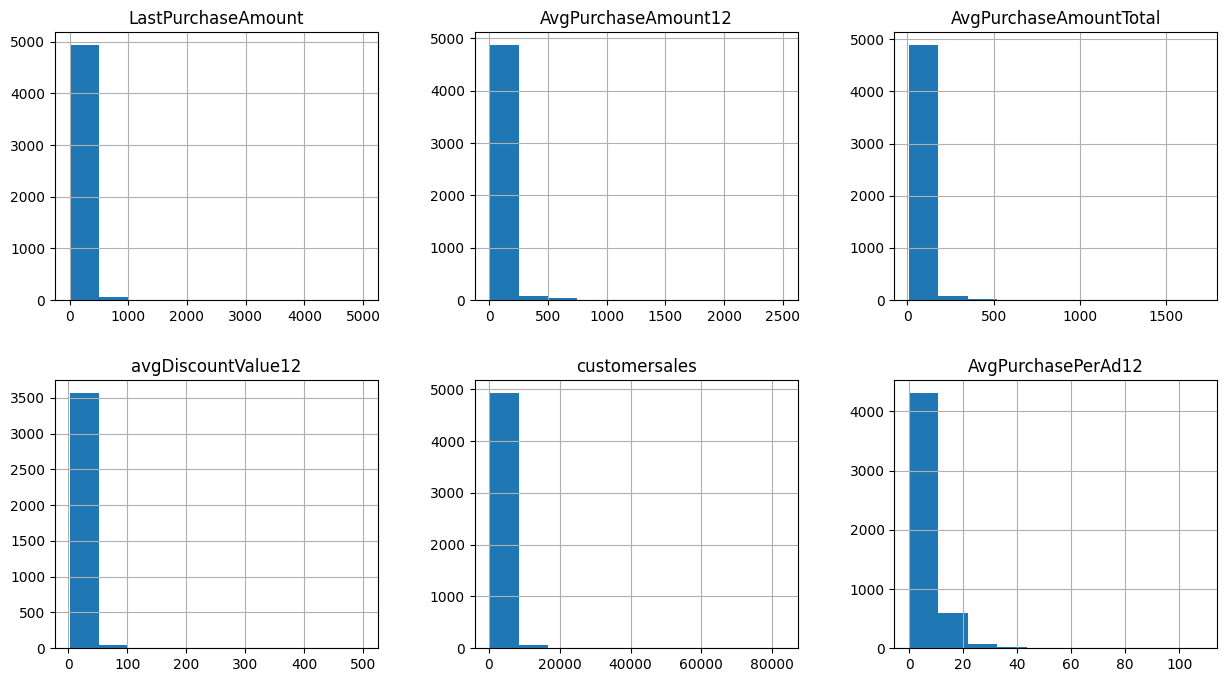

In [114]:
# Exploring Distribution of skewed columns
churn_df[skewed_cols].hist(figsize=(15,8),layout=(2,3))

In [115]:
# Define function to generate outlier plots
def box_plots(data:pd.DataFrame,columns: list, figsize: tuple=(15,5),fig_per_row:int=5)->plt:
   
    # Generates a grid displaying barplots for all specified columns.append
    
    # Parameters
    # ----------------
    # data: pd.DataFrame
    #     Pandas datafrme containing data visualized
    # columns: list
    #     List contining the name of the column to be visualized
    # figsize: tuple
    #     Dimensions of the plot grid that will be generated
    # fig_per_row: int
    #     How many figures a user wants per row. Default = 5

    # Determine plot dimensions
    if len(columns) < fig_per_row:
        nrows,ncols=1, fig_per_row
    else:
        nrows,ncols = ceil(len(columns) / fig_per_row), fig_per_row
    # Create subplots based on specified dimensions
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axs = axs.flatten()

    # Iterate through the columns and the created axes

    for col, ax in zip(columns,axs):
        sns.boxplot(data=data, y=col, ax=ax)
        ax.set_title(f"{col} Count Plot")

    # Ensure there is no overlap between plots
    plt.tight_layout()

    # Delete any unused axes
    for ax in axs[len(columns):]:
        fig.delaxes(ax)

    return fig


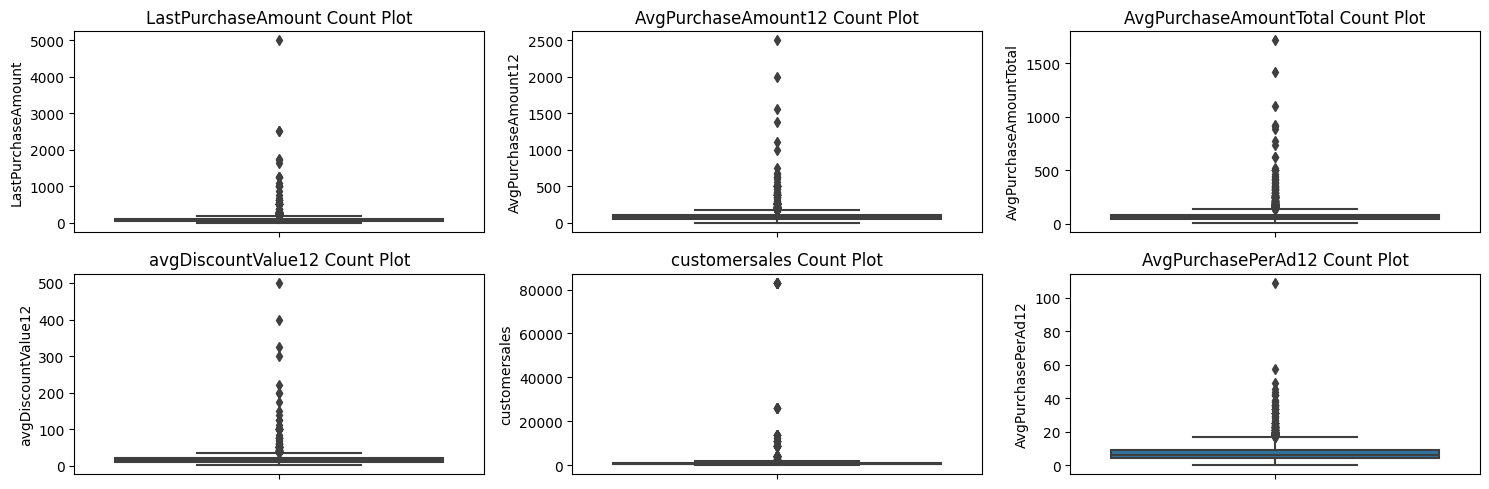

In [116]:
# Generate box and whisker plots
skewed_box_plots= box_plots(churn_df,skewed_cols, fig_per_row=3)

## Exploring Missingness

In [117]:
# Display the proportion of missing values
missing=churn_df.isna().sum()
missing=missing[missing>0]/churn_df.shape[0]
missing

avgDiscountValue12    0.2764
birthDate             0.2518
techSupportEval       0.0540
Review_Text           0.8436
Title                 0.8656
customerAge           0.2518
dtype: float64

In [118]:
# Display a sample of some of the missing columns
print(churn_df[missing.index].dtypes,end="\n\n")
churn_df[missing.index].head()

avgDiscountValue12    float64
birthDate              object
techSupportEval       float64
Review_Text            object
Title                  object
customerAge           float64
dtype: object



,avgDiscountValue12,birthDate,techSupportEval,Review_Text,Title,customerAge
0,NaN,23OCT2003,3.0,NaN,NaN,21.0
1,15.0,30JUL1997,5.0,NaN,NaN,27.0
2,25.0,26OCT1995,5.0,NaN,NaN,29.0
3,NaN,20APR2000,5.0,NaN,NaN,24.0
4,10.5,29MAR1994,5.0,NaN,NaN,30.0


array([[<Axes: title={'center': 'avgDiscountValue12'}>,
        <Axes: title={'center': 'techSupportEval'}>],
       [<Axes: title={'center': 'customerAge'}>, <Axes: >]], dtype=object)

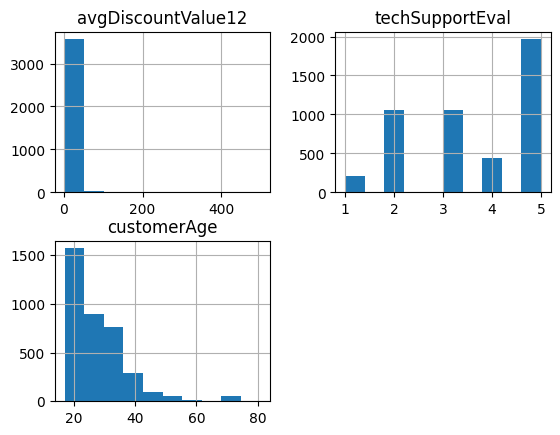

In [119]:
# Display the distribution of the missing values
missing_list=missing.index.to_list()
churn_df[missing_list].hist()

In [120]:
# Computes the correlation between all variables
corr_df = churn_df.corr(numeric_only=True)

# Fills the diagonals to exclude them from the computation
np.fill_diagonal(corr_df.values, val= np.nan)

# Selects rows with high correlations
high_corr=corr_df[(corr_df>0.9)|(corr_df< -0.9)]

# Drops rows, then columns, where the above thereshold is not met
high_corr=high_corr.dropna(how='all')
high_corr=high_corr.dropna(how='all', axis=1)

# Display columns with high correlation
high_corr.head()

,AvgPurchaseAmount12,intAdExposureCountAll,socialMediaAdCountAll,avgDiscountValue12
AvgPurchaseAmount12,NaN,NaN,NaN,0.982043
intAdExposureCountAll,NaN,NaN,0.945963,NaN
socialMediaAdCountAll,NaN,0.945963,NaN,NaN
avgDiscountValue12,0.982043,NaN,NaN,NaN


/usr/local/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Text(0.5, 1.0, 'Correlation HeatMap')

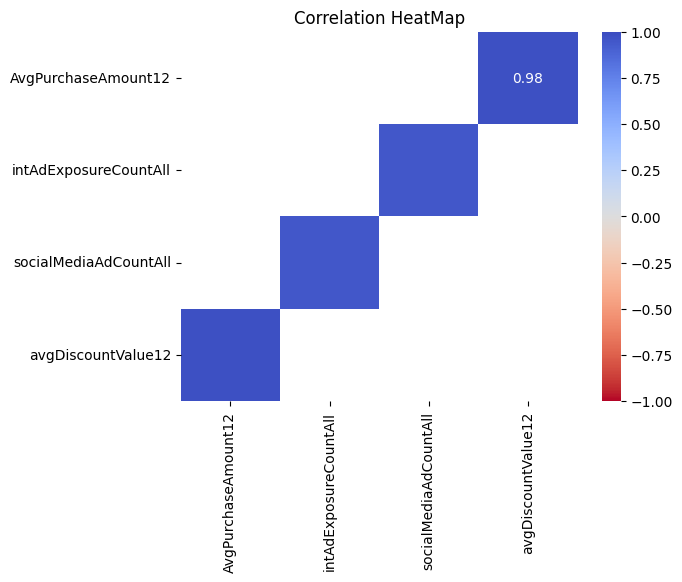

In [121]:
# Generate a heatmap using the correlation values
cmap=plt.get_cmap('coolwarm').reversed()
corr_plot=sns.heatmap(high_corr, vmin=-1,vmax=1,annot=True,cmap=cmap)
corr_plot.set_title("Correlation HeatMap")